# ANOVA

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# read the titanic data set
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## One Way ANOVA

In [5]:
# ANOVA
# c(pclass) is a categorical variable. Why c(pclass)?
# https://stackoverflow.com/questions/25676145/why-does-statsmodels-give-a-value-for-both-0-and-1-levels-of-a-categorical-var
model = ols('age ~ C(pclass)', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(pclass),20929.627754,2.0,57.443484,7.487984e-24
Residual,129527.008190,711.0,NaN,NaN


### Post - Hoc Test

To identify the significantly different group!!

In [6]:
for class1, class2 in [(1,2), (2, 3), (3, 1)]:
    print("Class {} vs Class {}".format(class1, class2))
    print(stats.ttest_ind(df[df.pclass == class1].age.dropna(),
                          df[df.pclass == class2].age.dropna()))
    print()

# By observing the p-values by applying the t-test between the groups of p-class,
# group 1 is significantly different from group 2 and group 3.

Class 1 vs Class 2
Ttest_indResult(statistic=5.485187676773201, pvalue=7.835568991415144e-08)

Class 2 vs Class 3
Ttest_indResult(statistic=3.927800191020872, pvalue=9.715078600777852e-05)

Class 3 vs Class 1
Ttest_indResult(statistic=-10.849122601201033, pvalue=6.134470007830625e-25)



In [10]:
# let's see the mean age of the different groups of the pclass.
df.groupby('pclass')["age"].mean()

# from the result, we can see that the mean age of the group 1 is significantly
# different from the mean age of the group 2 and group 3.

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [11]:
# If we take the significance level as 0.05, then we can say that the type-1 error
# for our test is 15% because we did 3 t-test with 0.05 significance level. To reduce the
# type-1 error, we can use the Bonferroni correction. The Bonferroni correction
# is a method used to counteract the problem of multiple comparisons. It is based
# on the idea that if an experimenter is testing m hypotheses, then one way of
# maintaining the familywise error rate (FWER) is to test each individual hypothesis
# at a statistical significance level of 1/m times the desired maximum overall level.
# In our case, we can use 0.05/3 = 0.0167 as the significance level for each t-test.

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,2,-8.3558,0.0,-11.7041,-5.0075,True
2,1,3,-13.0928,0.0,-15.9622,-10.2234,True
3,2,3,-4.737,0.0005,-7.6763,-1.7977,True


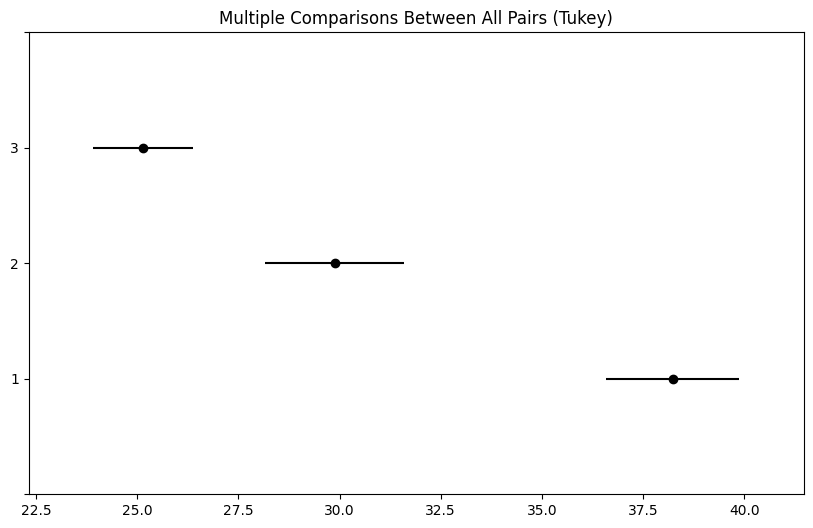

In [21]:
required_df = df[['age', 'pclass']].dropna()
tukey = pairwise_tukeyhsd(endog=required_df['age'], groups=required_df['pclass'], alpha=0.05)

tukey.plot_simultaneous()

plt.vlines(x=49.57, ymin=-0.5, ymax=4.5, color="red")

pd.DataFrame(tukey.summary())

#### With a different library

In [1]:
import seaborn as sns
import pingouin as pg  # pip install pingouin

# load the famous titanic dataset
df = sns.load_dataset('titanic')

anova_table = pg.anova(data=df, dv='age', between='pclass', detailed=True)

print(anova_table)

   Source             SS   DF            MS          F         p-unc       np2
0  pclass   20929.627754    2  10464.813877  57.443484  7.487984e-24  0.139107
1  Within  129527.008190  711    182.175820        NaN           NaN       NaN


In [2]:
import scipy.stats as stats

for class1, class2 in [(1,2), (2, 3), (3, 1)]:
    print(f"Class {class1} vs Class {class2}")
    print(stats.ttest_ind(df[df['pclass'] == class1]['age'].dropna(),
                          df[df['pclass'] == class2]['age'].dropna()))
    print()

Class 1 vs Class 2
Ttest_indResult(statistic=5.485187676773201, pvalue=7.835568991415144e-08)

Class 2 vs Class 3
Ttest_indResult(statistic=3.927800191020872, pvalue=9.715078600777852e-05)

Class 3 vs Class 1
Ttest_indResult(statistic=-10.849122601201033, pvalue=6.134470007830625e-25)



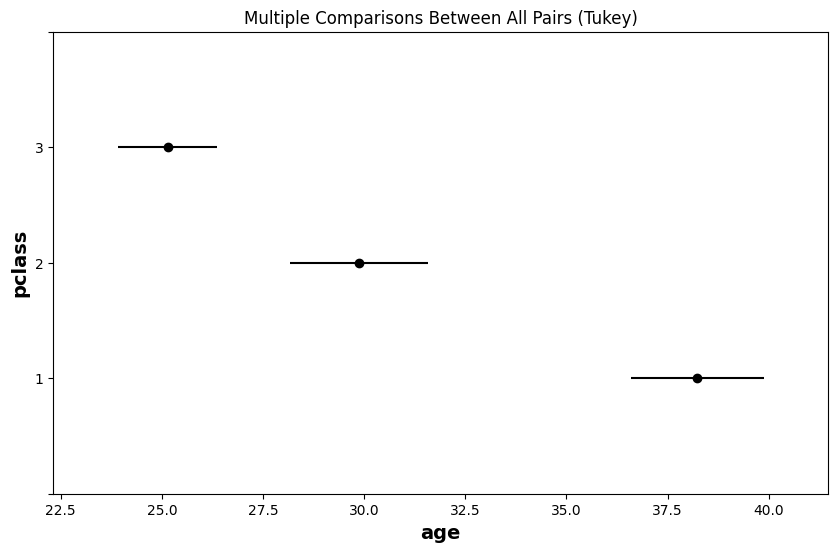

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# select our columns and drop the NaN values
required_df = df[['age', 'pclass']].dropna()
tukey = pairwise_tukeyhsd(endog=required_df['age'], groups=required_df['pclass'], alpha=0.05)

tukey.plot_simultaneous()
plt.xlabel('age', fontweight='bold', fontsize=14)
plt.ylabel('pclass', fontweight='bold', fontsize=14)
plt.savefig('tukey.png')

In [14]:
import pandas as pd

pd.DataFrame(tukey.summary())

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,2,-8.3558,0.0,-11.7041,-5.0075,True
2,1,3,-13.0928,0.0,-15.9622,-10.2234,True
3,2,3,-4.737,0.0005,-7.6763,-1.7977,True
